# Admission Predict Case Study**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [3]:
df.shape

(400, 9)

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [6]:
df.drop('Serial No.', axis =1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [7]:
df.columns


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
X= df.drop('Chance of Admit',axis=1)
y =df['Chance of Admit']

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size=0.20,
                                             random_state=10)

In [10]:
ytrain.value_counts(normalize=True)
# This seems to be balanced dataset.

0    0.55625
1    0.44375
Name: Chance of Admit, dtype: float64

In [11]:
xtrain.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [12]:
import statsmodels.api as sm

xtrain_c=sm.add_constant(xtrain)
xtest_c=sm.add_constant(xtest)

In [13]:
xtrain_c.columns

Index(['const', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research'],
      dtype='object')

In [14]:
logreg =sm.Logit(ytrain,xtrain_c).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                  0.6486
Time:                        01:15:08   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -63.1763     11.315     -5.583      0.000     -85.354     -40.998
GRE Scor

1. Except for CGPA, all the variables are insignificant.
2. The weight for CGPA is the heighest. Max weight is given to CGPA whereas other variables have very less weights.

### Predict and Find the Model Performance Metrics

In [20]:
ypred_prob= logreg.predict(xtest_c)

In [21]:
ypred_prob[0:5] # get the first 5 values of prediction

332    0.050634
111    0.800663
352    0.016492
205    0.000668
56     0.001146
dtype: float64

In [22]:
# using list comprehension
ypred=[0 if i <=0.5 else 1 for i in ypred_prob]
ypred[0:5]

[0, 1, 0, 0, 0]

In [23]:
ytest[0:5] # these are the actuals

332    1
111    0
352    0
205    0
56     0
Name: Chance of Admit, dtype: int64

1. out of the 5 elements listed above, two are incorrect and 3 are right prediction.
2. These are called as misclassification.
3. If we take only these 5 elements, we can say that the accuracy is  3/5 which is 60%.

#### Lets find the model accuracy

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.825

The accuracy of the model is 82.5%

In [25]:
np.log(0.497) + (np.log(0.558))

-1.2825615694863344

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[33,  9],
       [ 5, 33]], dtype=int64)

In [27]:
cm=confusion_matrix(ytest,ypred)

In [28]:
(33+33)/ (33+5+9+33)

0.825

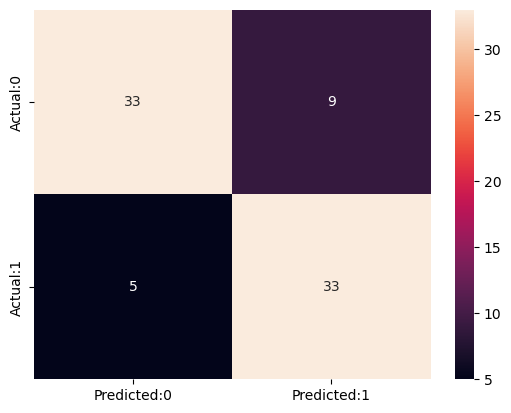

In [29]:
import seaborn as sns
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [30]:
cm

array([[33,  9],
       [ 5, 33]], dtype=int64)

In [31]:
TN = cm[0,0]
FP =cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [32]:
#sensitivity recall for positive class
sensitivity = TP /(FN+TP)
sensitivity

0.868421052631579

In [33]:
#specificity recall for Negative class
specificity = TN /(TN+FP)
specificity

0.7857142857142857

In [34]:
from sklearn.metrics import recall_score
recall_score(ytest,ypred)

0.868421052631579

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.79      0.87      0.82        38

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.82        80



In [36]:
from sklearn.metrics import log_loss
print(log_loss(ytest,ypred))

6.307639343095502


**This is on the higher side. This value should be closed to 0.**

In [37]:
ypred_prob

332    0.050634
111    0.800663
352    0.016492
205    0.000668
56     0.001146
         ...   
304    0.037234
187    0.997764
166    0.118340
64     0.549633
27     0.000442
Length: 80, dtype: float64

**Print the first 5 rows**

In [38]:
from sklearn.metrics import roc_curve,roc_auc_score

1. In all the above metrics- we were passing ytest and ypred. ypred is the label
2. In ROC curve, we are passing ytest and ypred_prob. Here we pass the probabilities.
3. We are focusing on positive class and not negative class.
4. ROC curve gives us 3 set  values - First is FPR, Second -TPR and third -Threshold.

In [39]:
print(roc_curve(ytest,ypred_prob))

(array([0.        , 0.        , 0.        , 0.02380952, 0.02380952,
       0.04761905, 0.04761905, 0.14285714, 0.14285714, 0.23809524,
       0.23809524, 0.30952381, 0.30952381, 0.33333333, 0.33333333,
       0.54761905, 0.54761905, 1.        ]), array([0.        , 0.02631579, 0.63157895, 0.63157895, 0.71052632,
       0.71052632, 0.76315789, 0.76315789, 0.86842105, 0.86842105,
       0.92105263, 0.92105263, 0.94736842, 0.94736842, 0.97368421,
       0.97368421, 1.        , 1.        ]), array([1.99954144e+00, 9.99541441e-01, 9.31355628e-01, 9.09319667e-01,
       8.60956416e-01, 8.58806131e-01, 8.41911606e-01, 7.97157602e-01,
       6.18555435e-01, 4.92806012e-01, 3.80298891e-01, 2.33502048e-01,
       2.21233752e-01, 2.20817772e-01, 1.95004427e-01, 6.35077653e-02,
       5.06341297e-02, 1.00881402e-04]))


In [40]:
fpr,tpr,threshold =roc_curve(ytest,ypred_prob)

**Now plot - fpr, tpr**

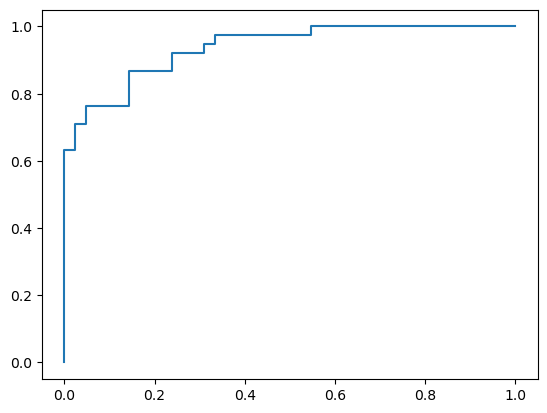

In [41]:
plt.plot(fpr,tpr)

0.93671679197995


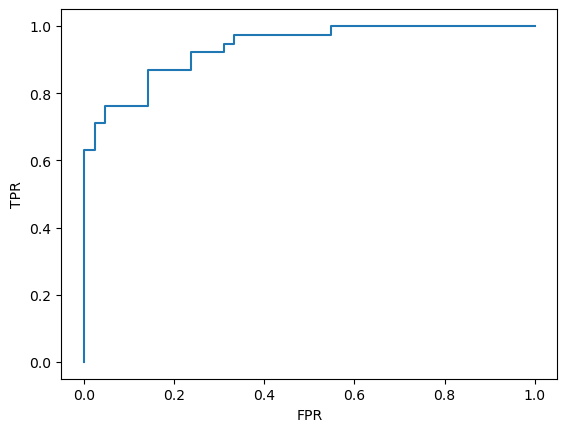

In [42]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

print(roc_auc_score(ytest,ypred_prob))

**Reliability- cohen kappa score**

In [43]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(ytest,ypred))

0.6508728179551122


This is pretty good reliability for the model.

1. Only in AUC, ROC -We use probability and not in all others

**All at one Summary Table**

In [44]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [45]:
# create an empty dataframe to store the scores for various algorithms
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

In [46]:
def per_measures(model,test,pred):


  accuracy    =accuracy_score(test,pred)
  f1score     =f1_score(test,pred)
  recall      =recall_score(test,pred)
  precision   =precision_score(test,pred)
  # aic         =model.aic
  # reliability = cohen_kappa_score(test,pred)



  return (accuracy,recall,precision,f1score,)

In [47]:
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [48]:
update_performance(name = 'LogisticReg-Base', model = logreg,test=ytest,pred=ypred)

# print the dataframe
perf_score

C:\Users\sobhr\AppData\Local\Temp\ipykernel_8252\1372990775.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825


## Can the Performance enhanced using cut off values

In [49]:
xtest.shape

(80, 7)

In [50]:
ytest.shape

(80,)

In [51]:
logreg.params

const               -63.176338
GRE Score             0.053187
TOEFL Score           0.032814
University Rating     0.515006
SOP                   0.175796
LOR                   0.570331
CGPA                  4.411370
Research              0.581890
dtype: float64

In [52]:
# import various functions from sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [53]:
# consider a list of values for cut-off

cutoff_per = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

thresh_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


for cutoff in thresh_value:


  ypred_prob = logreg.predict(xtest_c)
  ypred = [ 0 if x < cutoff else 1 for x in ypred_prob]

  global cutoff_per

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)},
                                    ignore_index = True)






C:\Users\sobhr\AppData\Local\Temp\ipykernel_8252\427377408.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
C:\Users\sobhr\AppData\Local\Temp\ipykernel_8252\427377408.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
C:\Users\sobhr\AppData\Local\Temp\ipykernel_8252\427377408.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
C:\Users\sobhr\AppData\Local\Temp\ipykernel_8252\427377408.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_per

In [54]:
cutoff_per

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.1,0.760652,0.660714,0.973684,0.7500,0.509804,0.787234
1,0.2,0.807018,0.720000,0.947368,0.8000,0.604938,0.818182
2,0.3,0.829574,0.760870,0.921053,0.8250,0.652605,0.833333
3,0.4,0.828321,0.772727,0.894737,0.8250,0.651741,0.829268
4,0.5,0.827068,0.785714,0.868421,0.8250,0.650873,0.825000
5,0.6,0.862782,0.846154,0.868421,0.8625,0.724656,0.857143
6,0.7,0.823308,0.833333,0.789474,0.8250,0.648241,0.810811
7,0.8,0.822055,0.852941,0.763158,0.8250,0.647355,0.805556
8,0.9,0.803885,0.960000,0.631579,0.8125,0.617834,0.761905


1. Best results are obtained for cutoff value of 0.6
2. We can start using cutoff =0.6 instead of cutoff = 0.5

<a id="youden"></a>
### Youden's Index

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [55]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': threshold})


# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR


youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.868421,0.142857,0.618555,0.725564
1,0.763158,0.047619,0.841912,0.715539
2,0.710526,0.023810,0.860956,0.686717
3,0.921053,0.238095,0.380299,0.682957
4,0.710526,0.047619,0.858806,0.662907


In [56]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.62 else 1 for x in ypred_prob]

In [57]:
acc_table = classification_report(ytest, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.84      0.84      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [58]:
update_performance(name = 'LogisticReg-Youden', model = logreg,test=ytest,pred=y_pred_youden)

# print the dataframe
perf_score

C:\Users\sobhr\AppData\Local\Temp\ipykernel_8252\1372990775.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'       : name,


,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105


**SKLEARN - LOGISTIC REGRESSION**

There are no parameters in logistic regression

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size=0.20,
                                             random_state=10)

In [62]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

ypred_lr_train = lr.predict(xtrain)
ypred_lr= lr.predict(xtest)

ypred_lr

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

**Training Performance**

In [63]:
print(accuracy_score(ytrain,ypred_lr_train))
print(confusion_matrix(ytrain,ypred_lr_train))
print(classification_report(ytrain,ypred_lr_train))

0.8625
[[159  19]
 [ 25 117]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       178
           1       0.86      0.82      0.84       142

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



**Testing Performance**

In [64]:
print(accuracy_score(ytest,ypred_lr))
print(confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

0.775
[[32 10]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.75      0.79      0.77        38

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.78        80



**1. There se**ems to be large difference between Train and Test Data

### Summarize the logistic Regression

In [65]:
update_performance(name = 'LogisticReg-skl', model = lr,test=ytest,pred=ypred_lr)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.775,0.789474,0.750000,0.769231


# Decision Tree -Classification

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt = DecisionTreeClassifier(random_state=10)

dt.fit(xtrain,ytrain)

ypred_dt_train = dt.predict(xtrain)


print(accuracy_score(ytrain,ypred_dt_train))
print(confusion_matrix(ytrain,ypred_dt_train))
print(classification_report(ytrain,ypred_dt_train))

1.0
[[178   0]
 [  0 142]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       142

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [80]:
dt = DecisionTreeClassifier(random_state=10)

dt.fit(xtrain,ytrain)

ypred_dt = dt.predict(xtest)


print(accuracy_score(ytest,ypred_dt))
print(confusion_matrix(ytest,ypred_dt))
print(classification_report(ytest,ypred_dt))


0.8
[[33  9]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.78      0.82      0.79        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



## Over-fitting in Decision Tree

1. The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.
2. Overfitting occurs as the decision tree tries to get the purest form irrespective of the depth of the decision tree.  The tree becomes very big and lands up to be complex algo with several nodes.
3. Overfitting means tree is fitting well on training data and performs poorly on test data.

**Summarize the Decision Tree with Default Criterion as Gini**

In [81]:
update_performance(name = 'Decision Tree-Gini', model = dt,test=ytest,pred=ypred_dt)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.775,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.800,0.815789,0.775000,0.794872


**Lets visualize the Tree which is build by the Model**

In [82]:
from sklearn import tree


In [83]:
dt_file=open('dt.dot','w')
dot_data=tree.export_graphviz(dt,out_file=dt_file)
dt_file.close()


**To visualize open Webgraphviz.com**

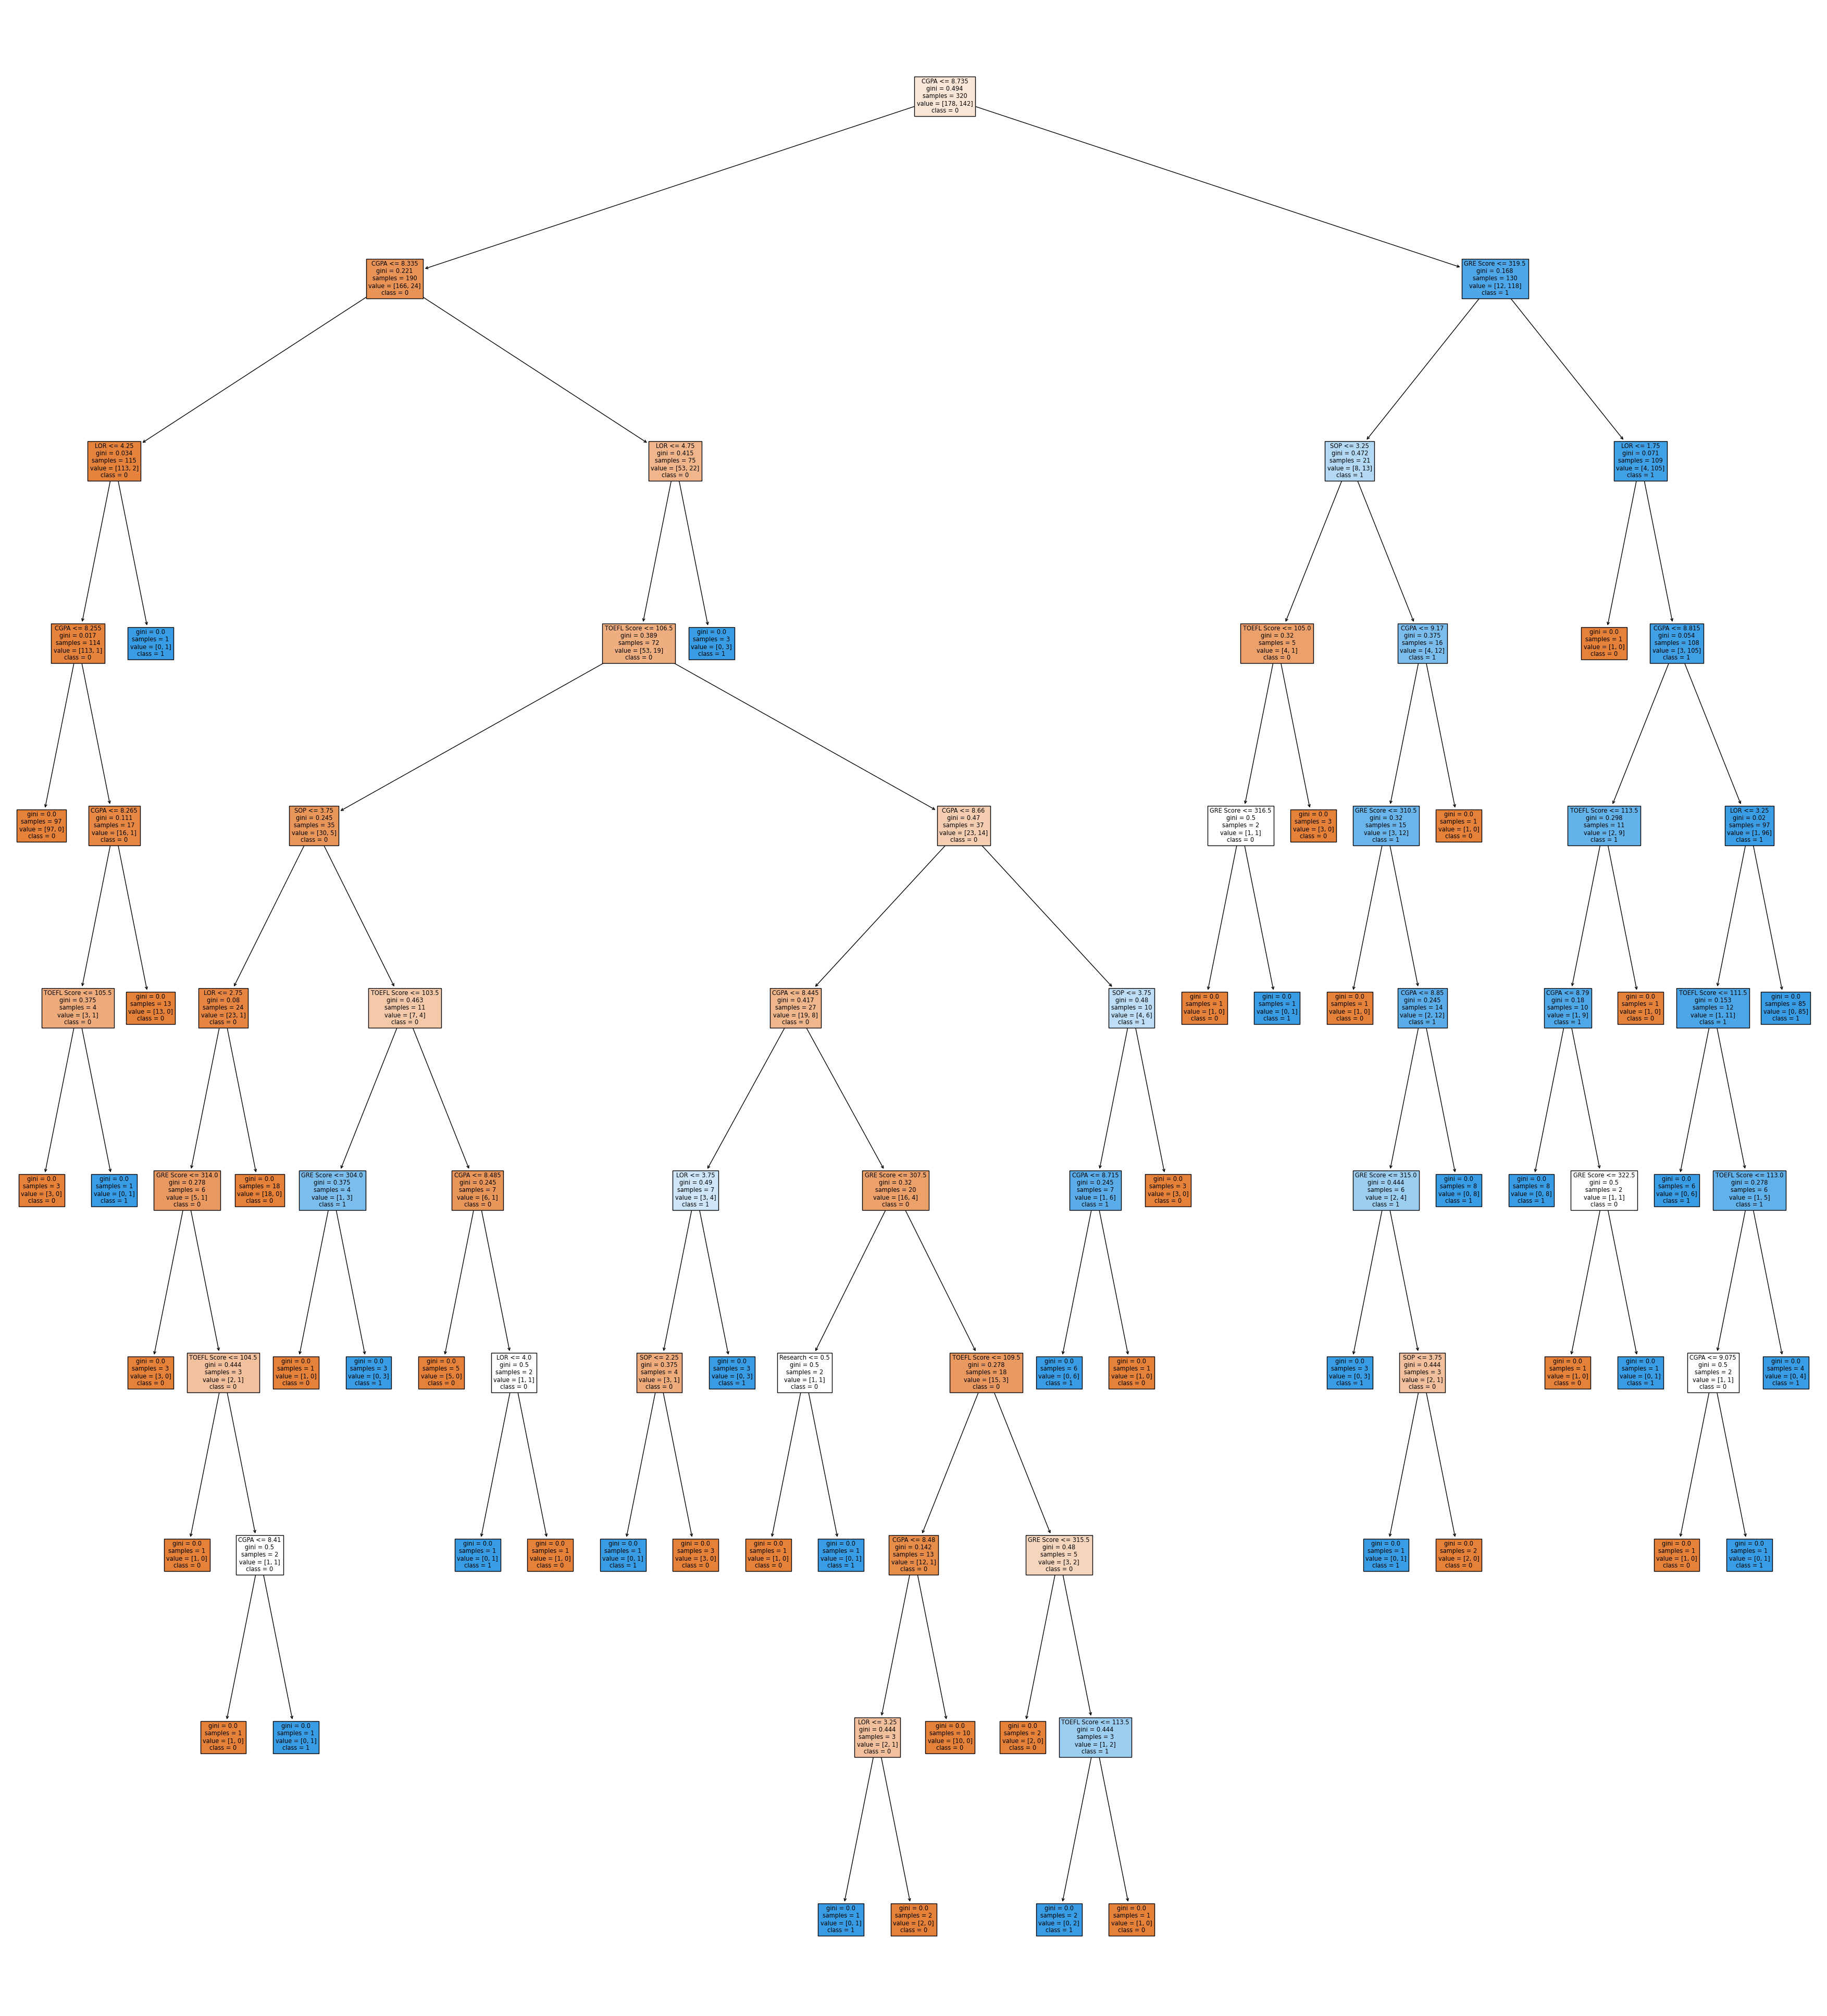

In [84]:
from sklearn import tree

fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dt,
                   feature_names=xtrain.columns,
                   class_names=["0","1"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

1. There are 2 colours. Orange and Blue.
2. Leaf are dark in colour. Dark Orange and Dark Blue. These are the ones which are completely pure.
3. Where ever, you see the white, it means that they are equal classes. Gini is 0.5.

**Lets build Tree with criteria =Entropy**

In [85]:
dt_e = DecisionTreeClassifier(criterion='entropy',random_state=10)

dt_e.fit(xtrain,ytrain)

ypred_dt_e = dt_e.predict(xtest)


print(accuracy_score(ytest,ypred_dt_e))
print(confusion_matrix(ytest,ypred_dt_e))
print(classification_report(ytest,ypred_dt_e))

0.8
[[33  9]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.78      0.82      0.79        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



**Summarize the Decision Tree using Criterion as Entropy**

In [86]:
update_performance(name = 'Decision Tree-Entropy', model = dt_e,test=ytest,pred=ypred_dt_e)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.775,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.800,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.800,0.815789,0.775000,0.794872


**Lets Visualize the Tree formation using Entropy as the Criterion**

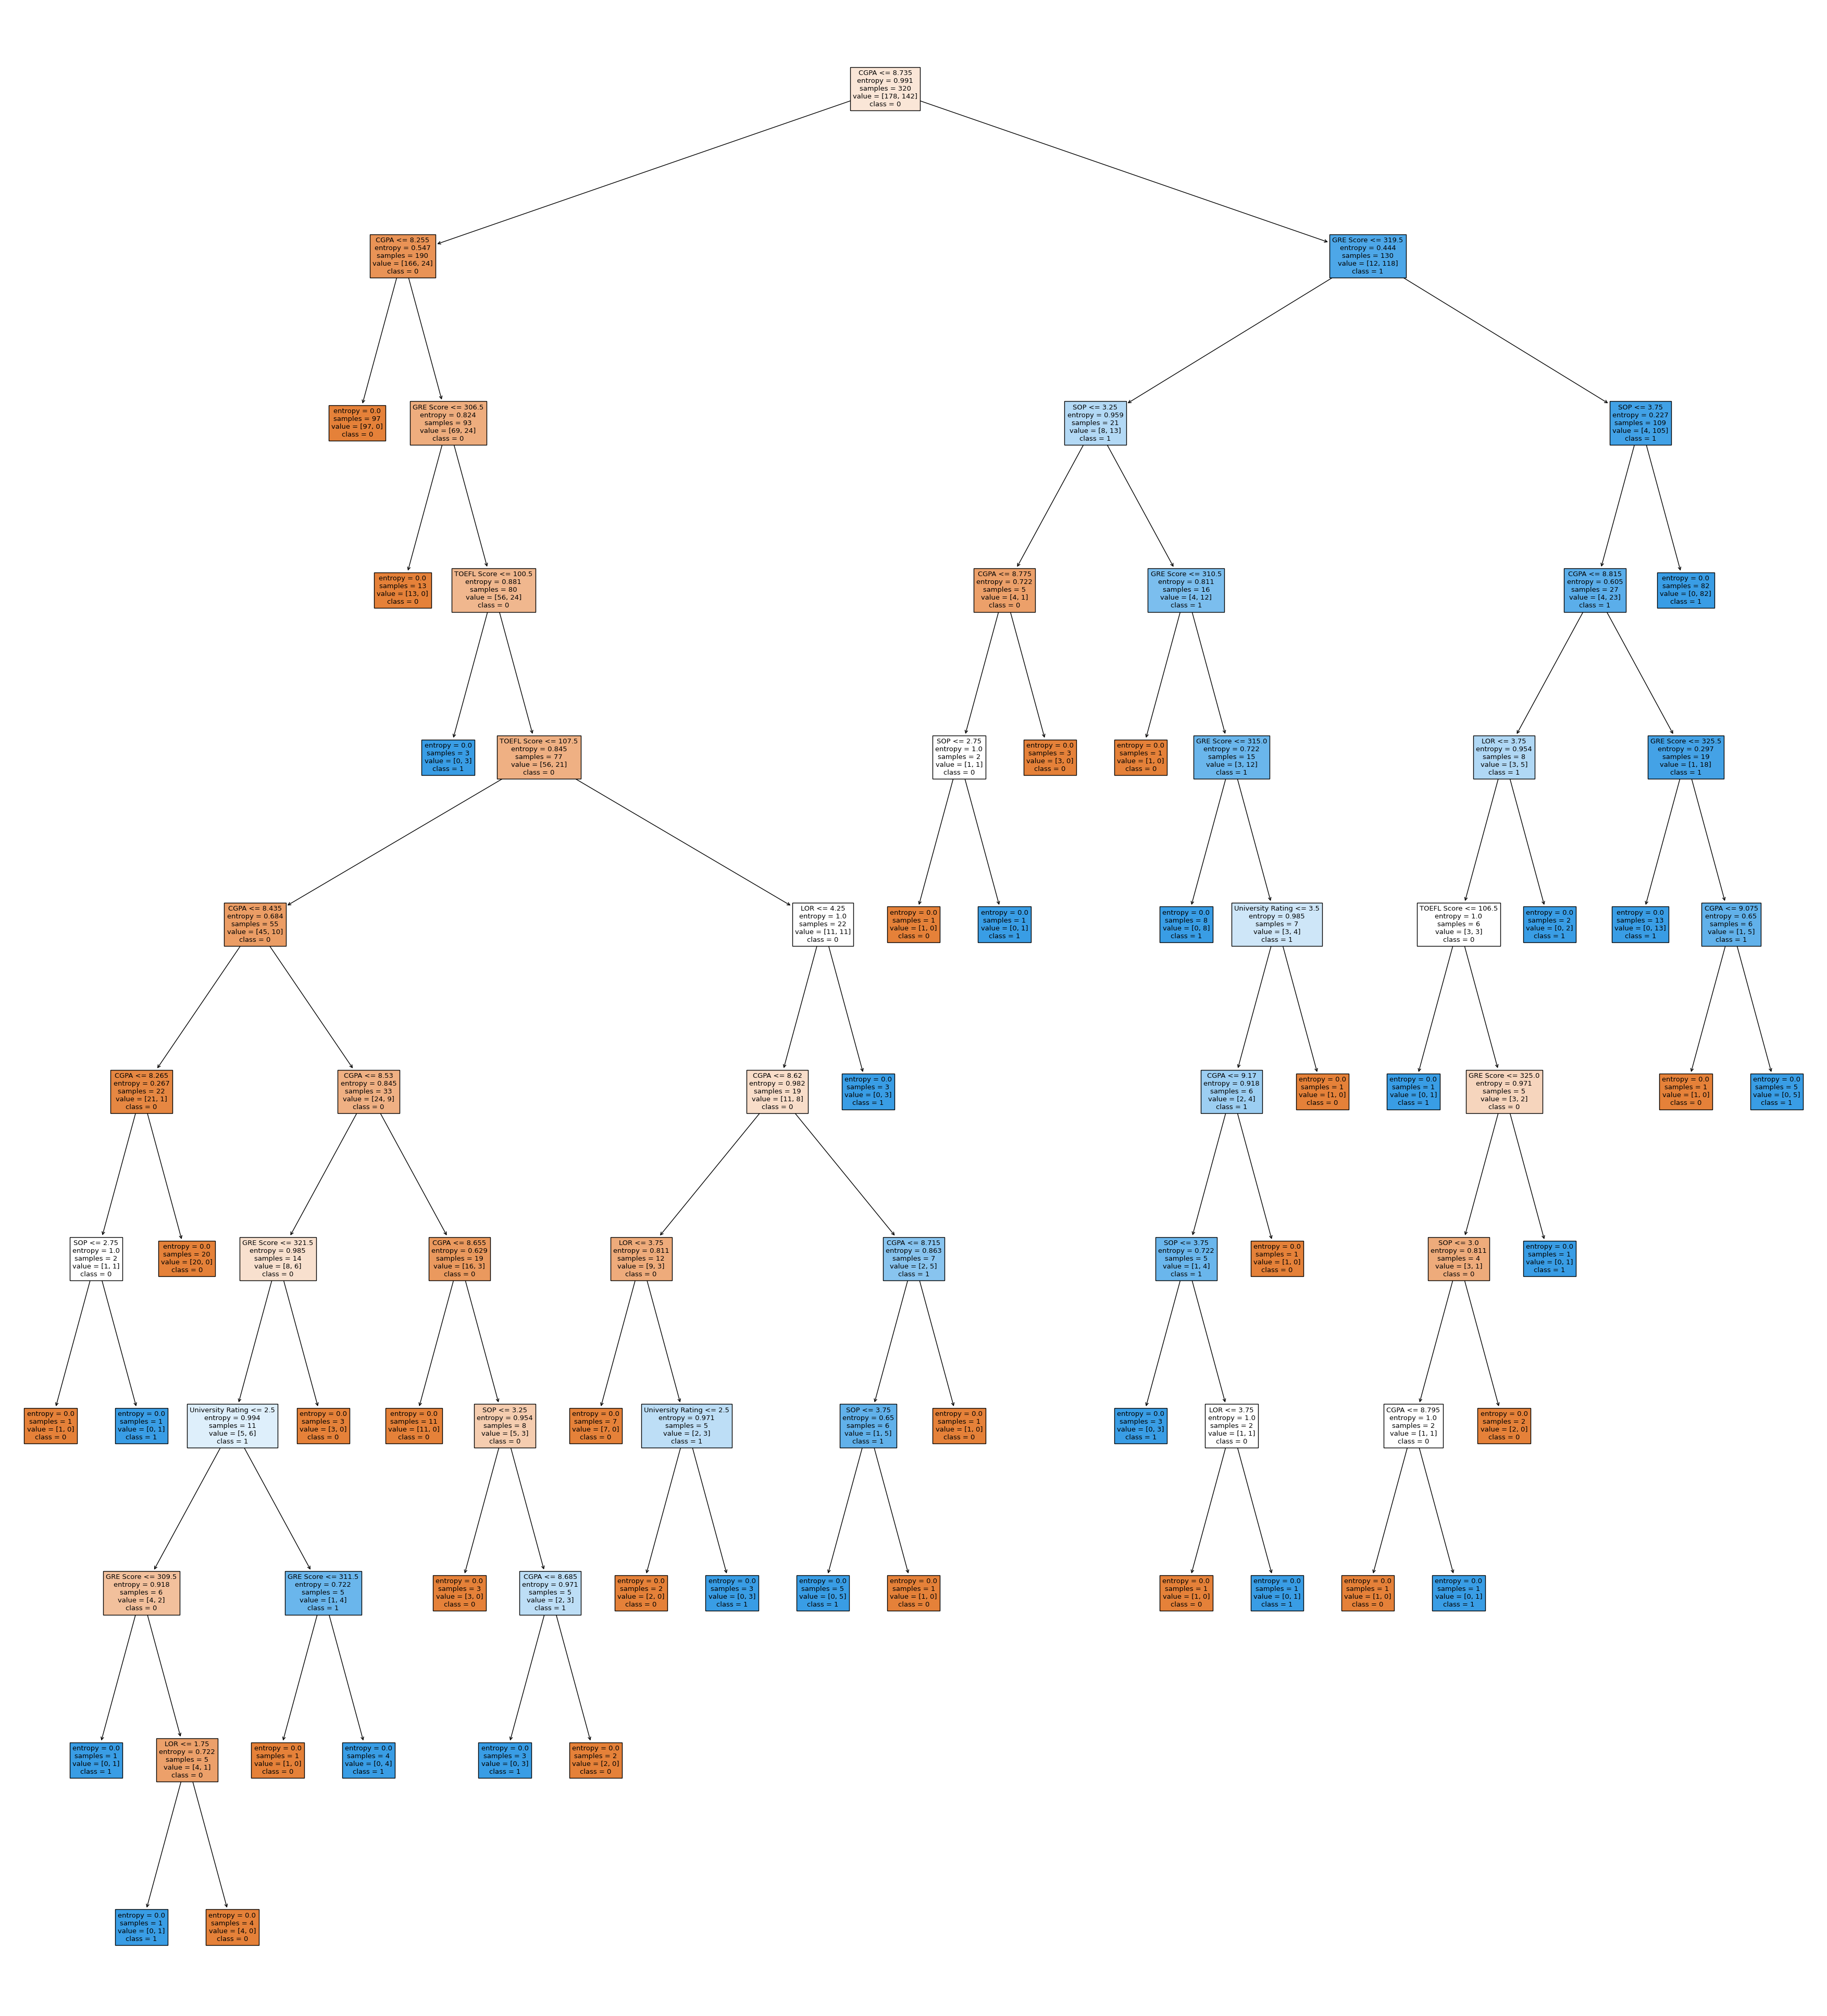

In [87]:
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dt_e,
                   feature_names=xtrain.columns,
                   class_names=["0","1"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

1. Tree will not be the same. But there will be some similarity.
2. This tree will also grow till it finds pure nodes.

**Lets Introduce some Hyper Parameters to tune the decision tree**

1. Max_Depth =None by default. Which means allow the tree to grow as much as possible.

In [88]:
dt_e3 = DecisionTreeClassifier(criterion='entropy',max_depth = 3,random_state=10)

dt_e3.fit(xtrain,ytrain)

ypred_dt_e3 = dt_e3.predict(xtest)

print(accuracy_score(ytest,ypred_dt_e3))
print(confusion_matrix(ytest,ypred_dt_e3))
print(classification_report(ytest,ypred_dt_e3))

0.85
[[37  5]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.86      0.82      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



**Generate a e3 Tree**

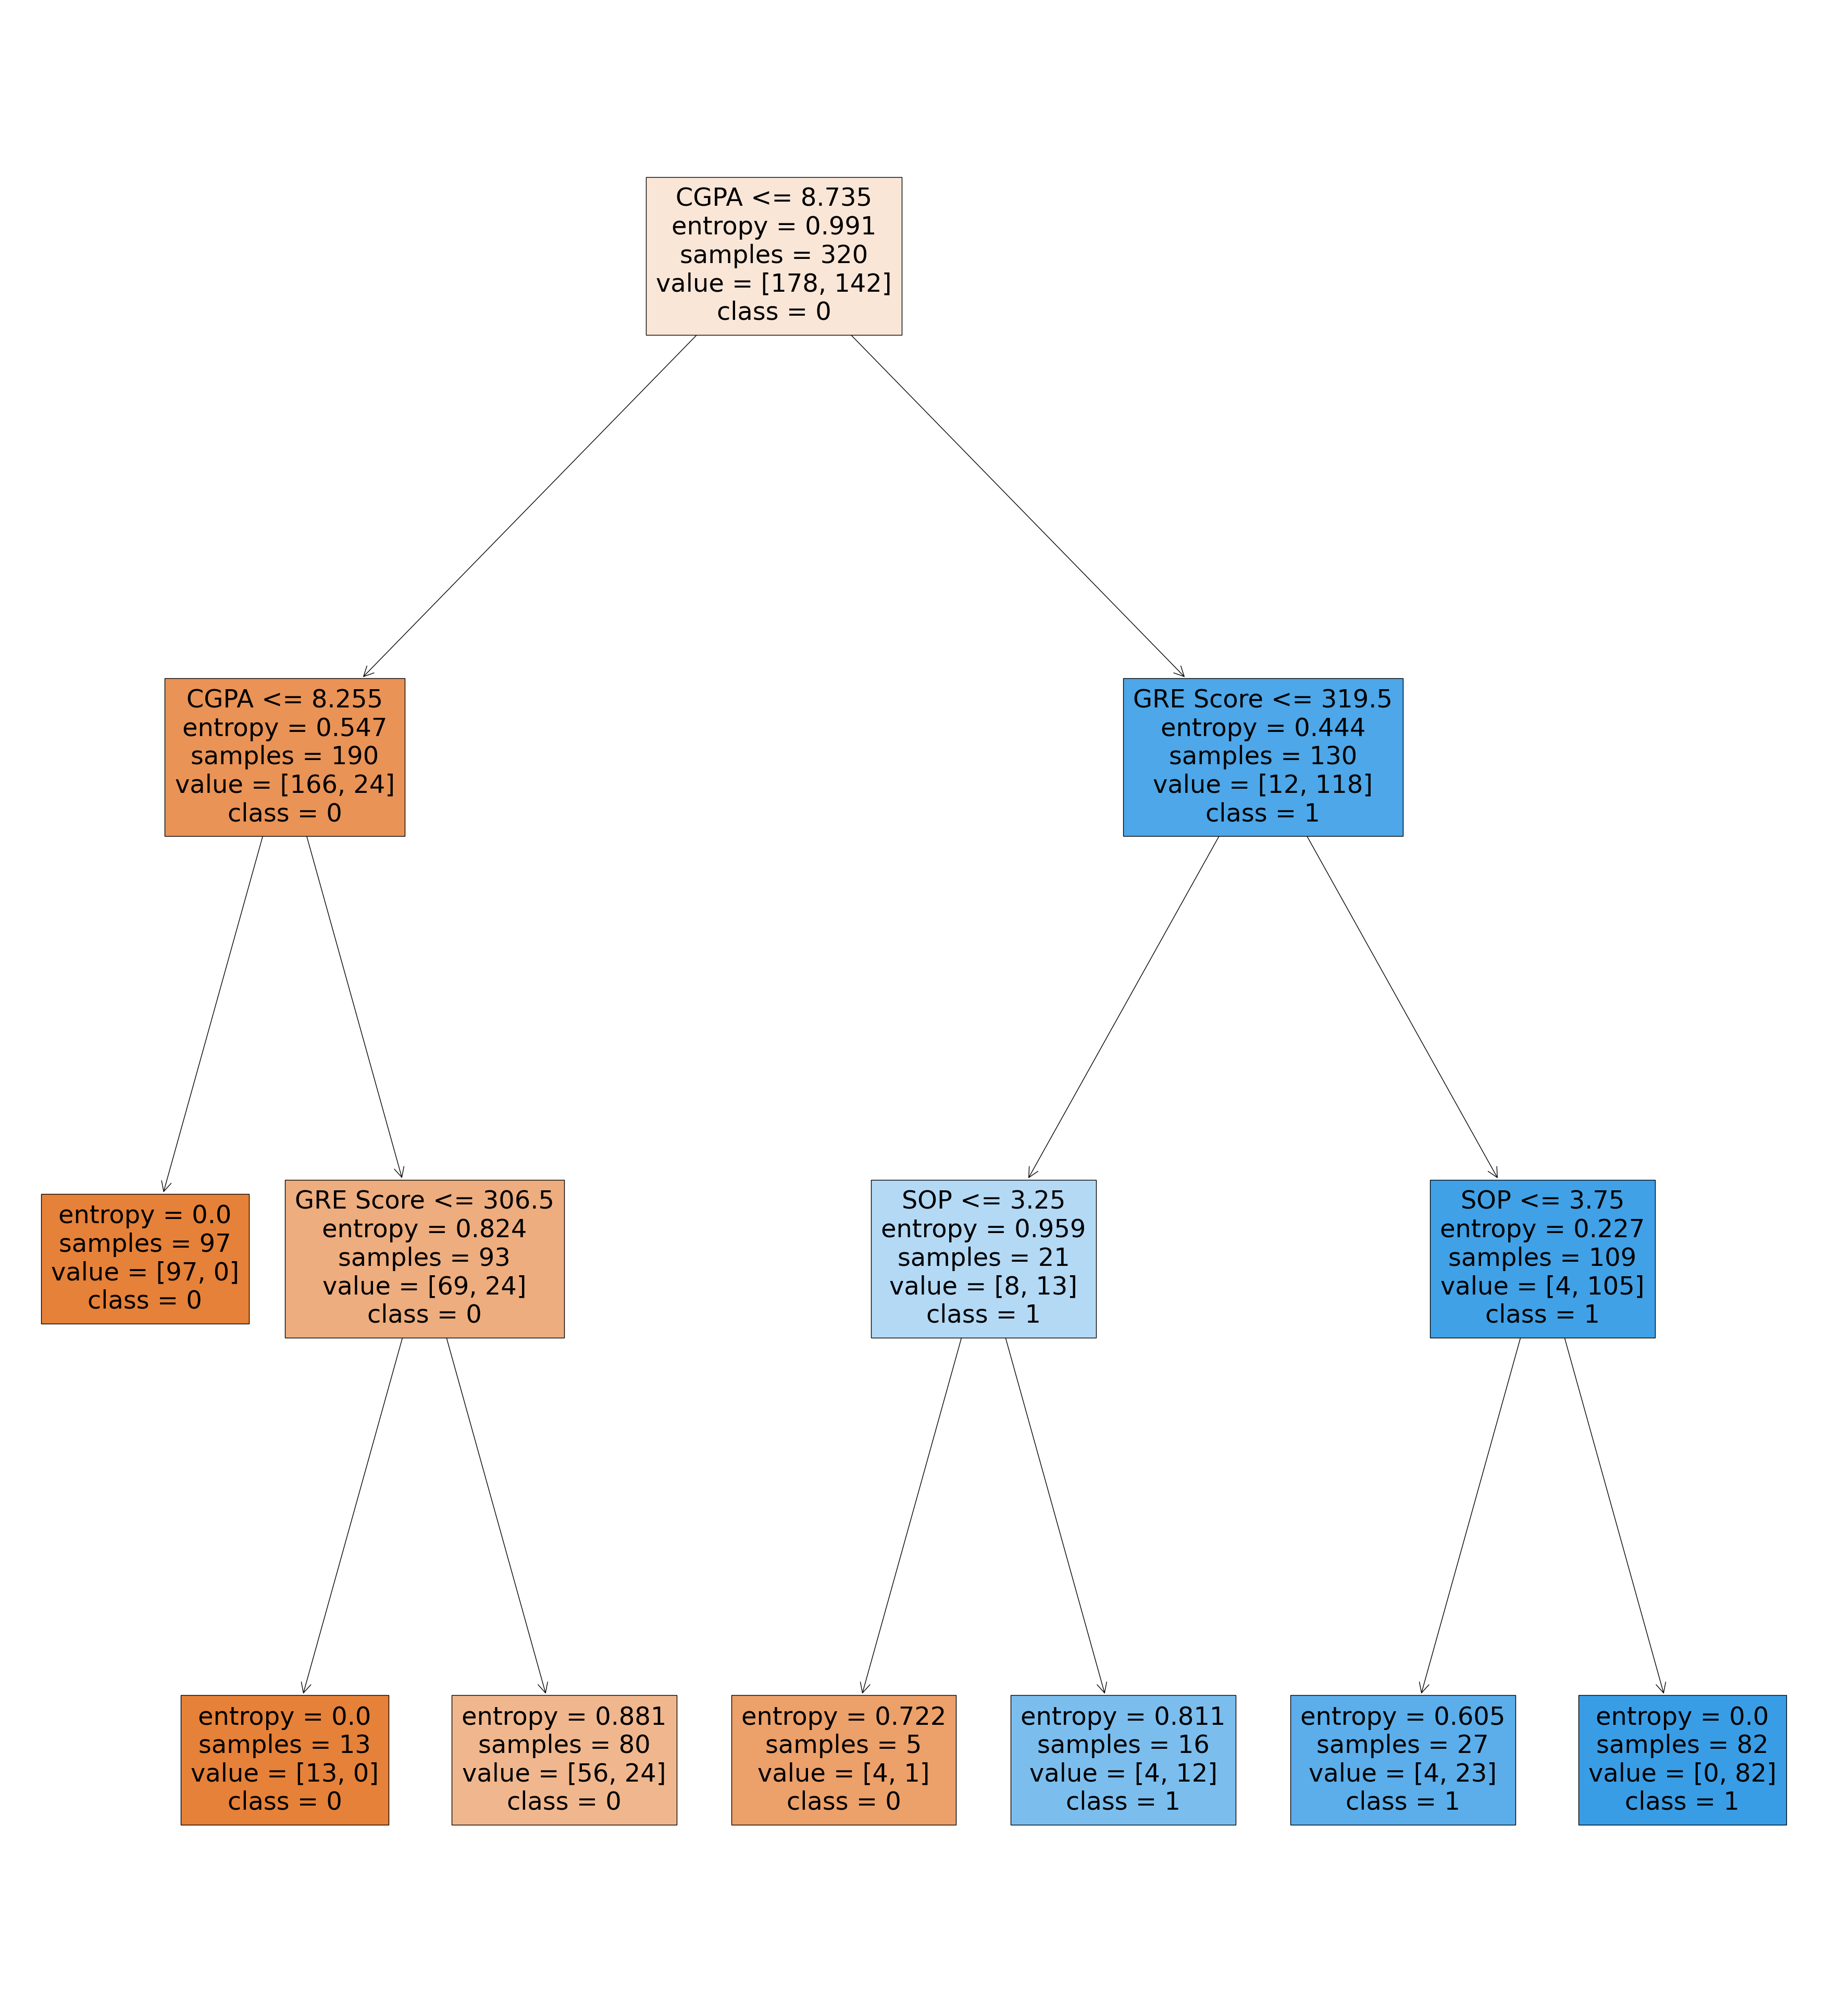

In [89]:
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dt_e3,
                   feature_names=xtrain.columns,
                   class_names=["0","1"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

1. Now the Tree will go till the depth of 3.
2. We build 3 Trees - Decision tree with Gini, DT with entropy (dt_e) and DT with entropy and Max_depth = 5.

Lets now understand the importance of features. Are all the features important.

In [90]:
dt.feature_importances_

array([0.07708937, 0.06772328, 0.        , 0.06195703, 0.07343017,
       0.71347003, 0.00633012])

1. The third feature is 0 which means it is not important.
2. Sixth feature is high value which means it is  very important.

In [91]:
xtrain.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [92]:
feature_imp = pd.DataFrame()
feature_imp['Feature']=xtrain.columns
feature_imp['Importance']=dt.feature_importances_

In [93]:
feature_imp

,Feature,Importance
0,GRE Score,0.077089
1,TOEFL Score,0.067723
2,University Rating,0.000000
3,SOP,0.061957
4,LOR,0.073430
5,CGPA,0.713470
6,Research,0.006330


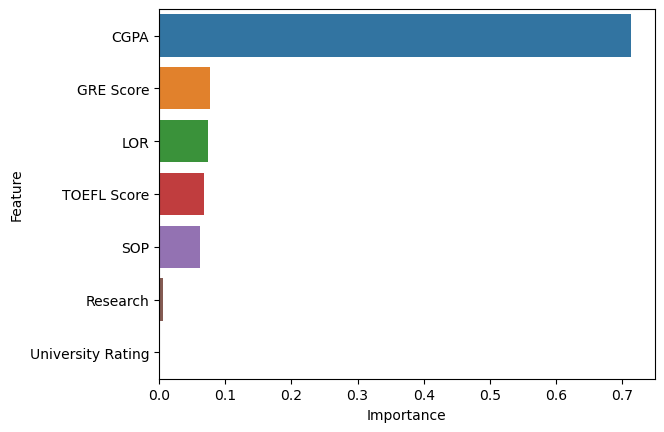

In [94]:
feature_imp = feature_imp.sort_values('Importance',ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.show()

Feature CGPA is very important compared to other feature.

**To Find Overfit and Underfitting conditions**

In [95]:
print('Train Accuracy',dt.score(xtrain,ytrain))
print('Test Accuracy',dt.score(xtest,ytest))

Train Accuracy 1.0
Test Accuracy 0.8


1. This is overfitting model as the training accuracy is  1.0
2. dt_score is the same as that for accuracy.
3. Here we had seen model with criterion as Gini

In [96]:
print('Train Accuracy',dt_e.score(xtrain,ytrain))
print('Test Accuracy',dt_e.score(xtest,ytest))

Train Accuracy 1.0
Test Accuracy 0.8


1. This is overfitting model as the training accuracy is  1.0
2. dt_score is the same as that for accuracy.
3. Here we had seen model with criterion as Entropy

1. The model is better than full model.
2. The model is not overfitting because there is very less variance between the train and test.
3. Cutting down the brances is bringing down the overfitting conditions
4. Cutting the down the tree technique is called as Pruning. Thus by using just one parameter, we overcame the problem of overfitting.
5. This model has entropy and one hyperparameter.

## Over-fitting in Decision Tree

1. The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.
2. Overfitting occurs as the decision tree tries to get the purest form irrespective of the depth of the decision tree.  The tree becomes very big and lands up to be complex algo with several nodes.
3. Overfitting means tree is fitting well on training data and performs poorly on test data.

**Use of GridSearchCV to find which depth is good one**

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
tuned_paramaters = [{'criterion': ['entropy','gini'],
                     'max_depth': [2,3,5,6,7,8,9,10],
}]

In [99]:
dt = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = dt, # The estimator can be is logistic, Linear reg, decision tree
                         param_grid = tuned_paramaters,
                         cv = 5)

In [100]:
tree_grid_model = tree_grid.fit(xtrain, ytrain)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2} 



In [101]:
ypred_dt_tp = tree_grid_model.predict(xtest)

print(accuracy_score(ytest,ypred_dt_tp))
print(confusion_matrix(ytest,ypred_dt_tp))
print(classification_report(ytest,ypred_dt_tp))

0.85
[[37  5]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.86      0.82      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [102]:
print('Train Accuracy',tree_grid_model.score(xtrain,ytrain))
print('Test Accuracy',tree_grid_model.score(xtest,ytest))

Train Accuracy 0.8875
Test Accuracy 0.85


**Lets Look at Other Hyparameters**

In [103]:
tuned_paramaters = [{'criterion': ['entropy','gini'],
                     'max_depth': [5,10],  # 5,6,7,
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8], # 1-3% of the total records
                     'min_samples_leaf': [1,5,9], # 1-3% of the min_sample_split
                     'max_leaf_nodes': [5,8]}]

In [104]:
dt = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = dt, # The estimator can be is logistic, Linear reg, decision tree
                         param_grid = tuned_paramaters,
                         cv = 5)

In [105]:
tree_grid_model = tree_grid.fit(xtrain, ytrain)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 9, 'min_samples_split': 2} 



In [106]:
dt_grid_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 5,
                                  min_samples_leaf = 9,
                                  min_samples_split = 2,
                                  random_state = 10)

In [107]:
dt_grid_model= dt_grid_model.fit(xtrain,ytrain)

In [108]:
ypred_dt_tp = dt_grid_model.predict(xtest)

print(accuracy_score(ytest,ypred_dt_tp))
print(confusion_matrix(ytest,ypred_dt_tp))
print(classification_report(ytest,ypred_dt_tp))

0.8375
[[35  7]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.82      0.84      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [109]:
print('Train Accuracy',tree_grid_model.score(xtrain,ytrain))
print('Test Accuracy',tree_grid_model.score(xtest,ytest))

Train Accuracy 0.859375
Test Accuracy 0.8375


1.The model performance is 83%.


In [110]:
ypred_dt_dp_train = tree_grid_model.predict(xtrain)

In [111]:
print(classification_report(ytrain,ypred_dt_dp_train))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       178
           1       0.93      0.74      0.82       142

    accuracy                           0.86       320
   macro avg       0.88      0.85      0.85       320
weighted avg       0.87      0.86      0.86       320



In [112]:
# evaluate using confusion matrix.

print(confusion_matrix(ytest,ypred_dt_tp))

[[35  7]
 [ 6 32]]


In [113]:
print(classification_report(ytest,ypred_dt_tp))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.82      0.84      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [114]:
print(classification_report(ytest,ypred_dt_tp))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.82      0.84      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



### Lets Summarize the Findings

In [115]:
update_performance(name = 'Decision Tree-Tuned', model = dt_grid_model,test=ytest,pred=ypred_dt_tp)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169


**Summary**

1. Decision Tree works better than Logistic Regression for the dataset given.
2. Decision Tree performance was enhanced further by fine tuning parameters.

## KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

**Training Performance**

In [117]:
#Training Data

ypred_knn_trn = knn.predict(xtrain)

print(accuracy_score(ytrain,ypred_knn_trn))
print(confusion_matrix(ytrain,ypred_knn_trn))
print(classification_report(ytrain,ypred_knn_trn))

0.8875
[[164  14]
 [ 22 120]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       178
           1       0.90      0.85      0.87       142

    accuracy                           0.89       320
   macro avg       0.89      0.88      0.89       320
weighted avg       0.89      0.89      0.89       320



1. Memorization happens on the training test
2. All the calculations happens when we give .predict(}

**Testing Performance**

In [118]:
#Testing Data

ypred_knn = knn.predict(xtest)

print(accuracy_score(ytest,ypred_knn))
print(confusion_matrix(ytest,ypred_knn))
print(classification_report(ytest,ypred_knn))


0.8375
[[33  9]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        42
           1       0.79      0.89      0.84        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



**Lets Summarize the results**

In [119]:
update_performance(name = 'KNearestNeighbour', model = knn,test=ytest,pred=ypred_knn)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506


**Cross Val Score**

by default the split is 5. We can use cv=3.

In [120]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn,xtrain,ytrain,scoring="accuracy")
score


array([0.84375 , 0.796875, 0.796875, 0.9375  , 0.8125  ])

In [121]:
np.mean(score)

0.8375

In [122]:
ypred_knn

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

1. [0.8, 0.2],The model says there is 80% probability that Data point 1 belongs to class 0 and 20% probability that it belongs to class 1.
2. [0.2, 0.8] The model says that there is 20% probability that the Data Point 2 belongs to class 0 and 80% probability that data point 2 belongs to class 1.
3. Whichever, Data point has higher probability, it belongs to that class.
4. For ROC, we need probability. Hence, we are using, predict.proba

In [123]:
ypred_prob_knn= knn.predict_proba(xtest)
ypred_prob_knn

array([[0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. ,

1. ROC curve is based on TPR and FPR
2. Focus is on class 1. Disease , default, diabetic.
3. Our focus is only on column 1 and not the 0 class.

Take all the rows and first column.

In [124]:
ypred_prob_knn[:,1]

array([0.2, 0.8, 0. , 0. , 0. , 0. , 1. , 1. , 1. , 0.2, 0.6, 1. , 0.8,
       0. , 1. , 1. , 0. , 0.8, 1. , 0.4, 1. , 0.6, 1. , 0.6, 0.4, 0.4,
       0.2, 1. , 0. , 0.6, 0.4, 0.6, 0.8, 1. , 0.2, 1. , 0. , 0. , 0.8,
       0.8, 1. , 0.8, 0.6, 0. , 0. , 0. , 0. , 0. , 0.2, 1. , 1. , 0.2,
       1. , 1. , 0. , 0.2, 0.8, 0.4, 0. , 0.2, 0. , 0.8, 0.6, 1. , 0. ,
       1. , 0.6, 0.4, 1. , 0. , 1. , 1. , 0.8, 0.2, 1. , 0. , 1. , 0. ,
       1. , 0. ])

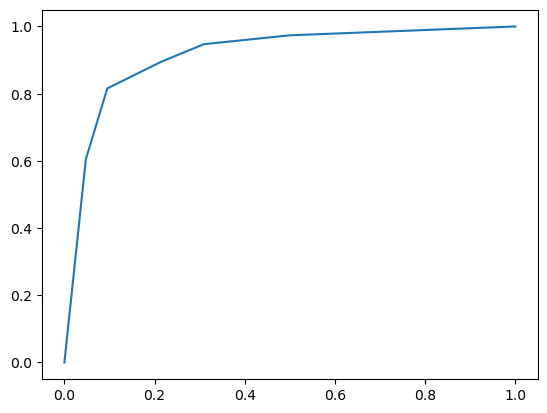

0.9141604010025063


In [125]:
ypred_prob_knn_1 = ypred_prob_knn[:,1] # collects all the probabilities belonging to class to 1.

fpr, tpr, threshold = roc_curve(ytest,ypred_prob_knn_1) # it gives 3 outputs - tpr, fpr and threshold.

plt.plot(fpr,tpr)
plt.show()

print(roc_auc_score(ytest,ypred_prob_knn_1))

**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [126]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    # evaluate test accuracy
    scores = knn.score(xtest, ytest)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.19999999999999996,
 0.17500000000000004,
 0.16249999999999998,
 0.15000000000000002,
 0.11250000000000004,
 0.11250000000000004,
 0.11250000000000004,
 0.13749999999999996,
 0.13749999999999996,
 0.125]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

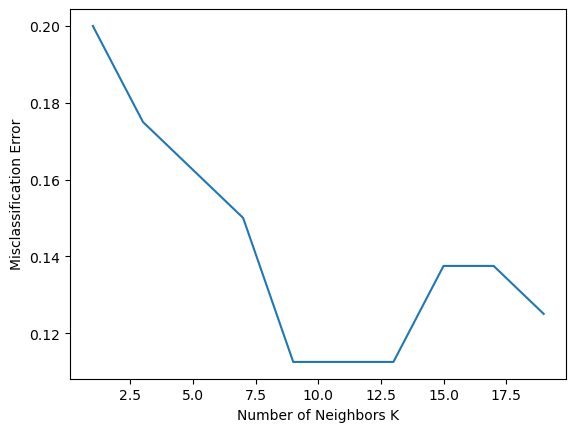

In [127]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [128]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [129]:
#Training Data

ypred_knn_trn = knn.predict(xtrain)

print(accuracy_score(ytrain,ypred_knn_trn))
print(confusion_matrix(ytrain,ypred_knn_trn))
print(classification_report(ytrain,ypred_knn_trn))

0.85625
[[164  14]
 [ 32 110]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       178
           1       0.89      0.77      0.83       142

    accuracy                           0.86       320
   macro avg       0.86      0.85      0.85       320
weighted avg       0.86      0.86      0.85       320



In [130]:
#Testing Data

ypred_knn = knn.predict(xtest)

print(accuracy_score(ytest,ypred_knn))
print(confusion_matrix(ytest,ypred_knn))
print(classification_report(ytest,ypred_knn))

0.8875
[[35  7]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        42
           1       0.84      0.95      0.89        38

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



In [131]:
pars = {'n_neighbors':[6,8,10,12,14,16,18],
       'algorithm':['auto','ball_tree','kd_tree','brute'],
       'p':[1,2],
       'metric':['minkowski','euclidean','manhattan','chebyshev','mahalanobis']}

In [132]:
from sklearn.model_selection import GridSearchCV
grid_knn =GridSearchCV(KNeighborsClassifier(),param_grid=pars, refit=True, verbose =1)
grid_knn.fit(xtrain,ytrain)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'mahalanobis'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18],
                         'p': [1, 2]},
             verbose=1)

In [133]:
grid_knn.best_params_

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 6, 'p': 1}

In [134]:
knn_grid=KNeighborsClassifier(n_neighbors=6,
                         algorithm='auto',
                         metric = 'minkowski',
                         p=1

                         )
knn_grid.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=6, p=1)

In [135]:
print('Classification report Train set :')
print(classification_report(ytrain,knn_grid.predict(xtrain)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       178
           1       0.91      0.78      0.84       142

    accuracy                           0.87       320
   macro avg       0.88      0.86      0.86       320
weighted avg       0.87      0.87      0.87       320



In [136]:
print('Classification report Test set :')
print(classification_report(ytest,knn_grid.predict(xtest)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.85      0.89      0.87        38

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80



In [137]:
print('Classification report Train set :')
print(classification_report(ytrain,grid_knn.predict(xtrain)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       178
           1       0.91      0.78      0.84       142

    accuracy                           0.87       320
   macro avg       0.88      0.86      0.86       320
weighted avg       0.87      0.87      0.87       320



In [138]:
print('Classification report Test set :')
print(classification_report(ytest,grid_knn.predict(xtest)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.85      0.89      0.87        38

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80



In [139]:
ypred_knn = knn_grid.predict(xtest)

In [140]:
update_performance(name = 'KNearestNeighbour-grid', model = knn_grid,test=ytest,pred=ypred_knn)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795


**Gaussian Naive Bayes**

In [141]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [142]:
gnb = GaussianNB()

**Training Performance**

In [143]:
gnb.fit(xtrain,ytrain)


ypred_gnb_train = gnb.predict(xtrain)

print(accuracy_score(ytrain,ypred_gnb_train))
print(confusion_matrix(ytrain,ypred_gnb_train))
print(classification_report(ytrain,ypred_gnb_train))



0.88125
[[162  16]
 [ 22 120]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       178
           1       0.88      0.85      0.86       142

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



**Testing Performance**

In [144]:
gnb.fit(xtrain,ytrain)

ypred_gnb = gnb.predict(xtest)

print(accuracy_score(ytest,ypred_gnb))
print(confusion_matrix(ytest,ypred_gnb))
print(classification_report(ytest,ypred_gnb))

0.85
[[34  8]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.81      0.89      0.85        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



Summarizing the performance

In [145]:
update_performance(name = 'Gaussian NB', model = gnb,test=ytest,pred=ypred_gnb)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000


**Bernoulli NB**

In [146]:
bnb = BernoulliNB()

**Training Performance**

In [147]:
bnb.fit(xtrain,ytrain)


ypred_bnb_train = bnb.predict(xtrain)

print(accuracy_score(ytrain,ypred_bnb_train))
print(confusion_matrix(ytrain,ypred_bnb_train))
print(classification_report(ytrain,ypred_bnb_train))

0.75625
[[123  55]
 [ 23 119]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       178
           1       0.68      0.84      0.75       142

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.77      0.76      0.76       320



**Testing Performance**

In [148]:

bnb.fit(xtrain,ytrain)


ypred_bnb = bnb.predict(xtest)

print(accuracy_score(ytest,ypred_bnb))
print(confusion_matrix(ytest,ypred_bnb))
print(classification_report(ytest,ypred_bnb))

0.7375
[[28 14]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        42
           1       0.69      0.82      0.75        38

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.75      0.74      0.74        80



**Lets Summarize the outcomes**

In [149]:
update_performance(name = 'Bernoulli NB', model = bnb,test=ytest,pred=ypred_bnb)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


**Multinomial Naive Bayes**

In [150]:
mnb = MultinomialNB()

**Training Performance**

In [151]:
mnb.fit(xtrain,ytrain)


ypred_mnb_train = mnb.predict(xtrain)

print(accuracy_score(ytrain,ypred_mnb_train))
print(confusion_matrix(ytrain,ypred_mnb_train))
print(classification_report(ytrain,ypred_mnb_train))

0.825
[[151  27]
 [ 29 113]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       178
           1       0.81      0.80      0.80       142

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



**Testing Performance**

In [152]:


mnb.fit(xtrain,ytrain)


ypred_mnb = mnb.predict(xtest)

print(accuracy_score(ytest,ypred_mnb))
print(confusion_matrix(ytest,ypred_mnb))
print(classification_report(ytest,ypred_mnb))

0.8125
[[34  8]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.79      0.82      0.81        38

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



**Summarize the outcomes from the model**

In [153]:
update_performance(name = 'Multinomial NB', model = mnb,test=ytest,pred=ypred_mnb)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


**What is OOB ? **

Probability of being selected is 1 /N

Probability of not being selected is 1- 1/N

For several N , the probability can be expressed as (1-1/N)^N

SAY WE HAVE 50,000 rows not being selected

In [154]:
# (1-(1/50000)) RAISED to 50000
pow(1-(1/50000), 50000)

0.3678757623460058

## RANDOM FOREST

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rf = RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=10)

**Training Performance**

In [157]:
ypred_rf_train = rf.predict(xtrain)

print(accuracy_score(ytrain,ypred_rf_train))
print(confusion_matrix(ytrain,ypred_rf_train))
print(classification_report(ytrain,ypred_rf_train))

1.0
[[178   0]
 [  0 142]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       142

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



**Testing Performance**

In [158]:
rf.fit(xtrain,ytrain)
ypred_rf = rf.predict(xtest)

print(accuracy_score(ytest,ypred_rf))
print(confusion_matrix(ytest,ypred_rf))
print(classification_report(ytest,ypred_rf))


0.85
[[35  7]
 [ 5 33]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.82      0.87      0.85        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



1. There are 2 ways at looking whether the model is overfit or underfit models
2. By using classification report or using score function

In [159]:
print('Train Accuracy',rf.score(xtrain,ytrain))
print('Test Accuracy',rf.score(xtest,ytest))

Train Accuracy 1.0
Test Accuracy 0.85


1. The model is still overfitting even when we have 100 trees.

**Summarize the outcomes for Random Forest**

In [160]:
update_performance(name = 'Random Forest', model = rf,test=ytest,pred=ypred_rf)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


**OOB SAMPLE -PERFORMANCE**

In [161]:
rf = RandomForestClassifier(oob_score=True, random_state=10)

rf.fit(xtrain,ytrain)

ypred_rf = rf.predict(xtest)
print(accuracy_score(ytest,ypred_rf))

print(rf.oob_score_)


0.85
0.871875


**Is there a scope for Improvement -Lets Fine Tune the performance of Random Forest**

In [162]:
params =             [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [100],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [5, 9],
                     'max_leaf_nodes': [8, 11]}]

In [163]:
rf =RandomForestClassifier(random_state=10)

rf_cv = GridSearchCV(rf,params,cv=5,scoring='accuracy')

rf_cv.fit(xtrain,ytrain)

rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [164]:

rf_model = RandomForestClassifier(criterion ='entropy' ,
                                  n_estimators =100 ,
                                  max_depth = 10 ,
                                  max_features = 'sqrt',
                                  max_leaf_nodes =8 ,
                                  min_samples_leaf =5 ,
                                  min_samples_split = 2,
                                  random_state = 10)


rf_model.fit(xtrain,ytrain)

ypred_rf_tp = rf_model.predict(xtest)

print(accuracy_score(ytest,ypred_rf_tp))
print(confusion_matrix(ytest,ypred_rf_tp))
print(classification_report(ytest,ypred_rf_tp))

0.85
[[34  8]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.81      0.89      0.85        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



Summarize the performance

In [165]:
update_performance(name = 'Random Forest-Tunned', model = rf_model,test=ytest,pred=ypred_rf_tp)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


## BAGGING CLASSIFIER

In [166]:
from sklearn.ensemble import BaggingClassifier

dt=DecisionTreeClassifier(random_state=10)

bc=BaggingClassifier(dt) # by default the estimator is Decision Tree
bc.fit(xtrain,ytrain)

ypred_bc = bc.predict(xtest)

print(accuracy_score(ytest,ypred_bc))

0.8375


Summarizing the performance

In [167]:
update_performance(name = 'Bagging Classifier-dt', model = bc,test=ytest,pred=ypred_bc)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


### KNN MODEL AS base model

In [168]:
from sklearn.ensemble import BaggingClassifier

knn=KNeighborsClassifier()

bag_knn=BaggingClassifier(knn,random_state=10) # by default the estimator is Decision Tree
bag_knn.fit(xtrain,ytrain)

ypred_bag_knn = bag_knn.predict(xtest)

print(accuracy_score(ytest,ypred_bag_knn))

0.8375


1. The model performance has improved compared to RF and Decision Tree
2. We have to run several models and then check the performance

Summarizing the performance

In [169]:
update_performance(name = 'Bagging Classifier-knn', model = bag_knn,test=ytest,pred=ypred_bag_knn)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


### Bagging -LR Model. LR as base model

In [170]:

logr=LogisticRegression()

bag_logr=BaggingClassifier(logr,random_state=10) # by default the estimator is Decision Tree
bag_logr.fit(xtrain,ytrain)

ypred_bag_logr = bag_logr.predict(xtest)

print(accuracy_score(ytest,ypred_bag_logr))

0.8125


Summarizing the performance

In [171]:
update_performance(name = 'Bagging Classifier-Log', model = bag_logr,test=ytest,pred=ypred_bag_logr)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


**Ensemble Learning- AdaBoosting**

In [172]:
from sklearn.ensemble  import AdaBoostClassifier


Estimator as decision tree

In [173]:
abcl = AdaBoostClassifier(dt,random_state=10)
abcl.fit(xtrain,ytrain)

ypred_abcl = abcl.predict(xtest)
print(accuracy_score(ytest,ypred_abcl))

0.775


Summarizing the performance

In [174]:
update_performance(name = 'AdaBoost-dt', model = abcl,test=ytest,pred=ypred_abcl)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


Estimator as random forest

In [175]:
abcl_rf = AdaBoostClassifier(rf_model,random_state=10)
abcl_rf.fit(xtrain,ytrain)

ypred_abcl_rf = abcl_rf.predict(xtest)
print(accuracy_score(ytest,ypred_abcl_rf))

0.8125


In [176]:
update_performance(name = 'AdaBoost-rf', model = abcl_rf,test=ytest,pred=ypred_abcl_rf)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


Estimator as multinomial naive bayes

In [177]:
abcl_mnb = AdaBoostClassifier(mnb,random_state=10)
abcl_mnb.fit(xtrain,ytrain)

ypred_abcl_mnb = abcl_mnb.predict(xtest)
print(accuracy_score(ytest,ypred_abcl_mnb))

0.475


In [178]:
update_performance(name = 'AdaBoost-mnb', model = abcl_mnb,test=ytest,pred=ypred_abcl_mnb)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


Ensemble Learning - Gradient Boosting

In [179]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=10)
gbcl.fit(xtrain,ytrain)
ypred_gbcl = gbcl.predict(xtest)
print(accuracy_score(ytest,ypred_gbcl))

0.8125


In [180]:
gbcl = GradientBoostingClassifier(n_estimators=50,learning_rate=0.5,random_state=10,max_depth=3)
gbcl.fit(xtrain,ytrain)
ypred_gbcl = gbcl.predict(xtest)
print(accuracy_score(ytest,ypred_gbcl))

0.85


In [181]:
gbcl = GradientBoostingClassifier(n_estimators=50,learning_rate=0.5,random_state=10,max_depth=3)
gbcl.fit(xtrain,ytrain)
ypred_gbcl = gbcl.predict(xtest)
print(accuracy_score(ytest,ypred_gbcl))

0.85


Summarizing the performance

In [182]:
update_performance(name = 'Gradient Boosting', model = gbcl,test=ytest,pred=ypred_gbcl)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


XGBOOST

In [183]:
# !pip install xgboost

In [184]:
from xgboost import XGBClassifier

In [185]:
xgb= XGBClassifier(random_state=10)
xgb.fit(xtrain,ytrain)


ypred_xgb= xgb.predict(xtest)
print(accuracy_score(ytest,ypred_xgb))

0.8125


In [186]:
xgb= XGBClassifier(booster='gbtree',gamma=3,max_depth=3, min_child_weight=3,
                   n_estimator=50, reg_lambda=1,random_state=10)
xgb.fit(xtrain,ytrain)


ypred_xgb= xgb.predict(xtest)
print(accuracy_score(ytest,ypred_xgb))

0.8375


Summarizing the performance

In [187]:
update_performance(name = 'XGB', model = xgb,test=ytest,pred=ypred_xgb)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


### STACKING

In [188]:
from sklearn.ensemble import StackingClassifier

In [189]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()

In [190]:
base_learners=[('lr_model',lr),('knn_model',knn),('DT_model',dt)]

stack =StackingClassifier(estimators=base_learners,
                          final_estimator=GaussianNB())

stack.fit(xtrain,ytrain)
ypred_stack = stack.predict(xtest)
print(accuracy_score(ytest,ypred_stack))

0.8375


Summarizing the performance

In [191]:
update_performance(name = 'Stacking', model = stack,test=ytest,pred=ypred_stack)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


### Voting Classifier

In [192]:
from sklearn.ensemble import VotingClassifier

In [193]:
vote_hard =VotingClassifier(estimators=base_learners )

vote_hard.fit(xtrain,ytrain)
ypred_vote = vote_hard.predict(xtest)
print(accuracy_score(ytest,ypred_vote))

0.775


In [194]:
vote_soft =VotingClassifier(estimators=base_learners ,voting='soft')

vote_soft.fit(xtrain,ytrain)
ypred_vote = vote_soft.predict(xtest)
print(accuracy_score(ytest,ypred_vote))

0.7875


Summarizing the performance

In [195]:
update_performance(name = 'Voting', model = vote_soft,test=ytest,pred=ypred_vote)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988
